# Aula 3 - Pandas

Nessa aula, iremos tratar dos seguintes conteúdos:
- Pandas
- Series
- Métodos Pandas
- DataFrames
- Combinando DataFrames
- Trabalhando com CSVs
- GroupBy e Agregadores

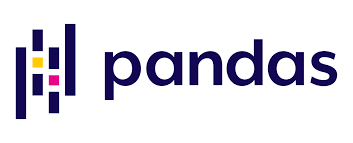

##   

## Pandas

__Pandas__ é um pacote python construído com base no __NumPy__ e __Matplotlib__ que busca organizar dados no formato de tabela, atribuindo rótulos às linhas e colunas. O pacote __Pandas__ fornece ainda um conjunto de funcionalidades que permite processar as informações de tabelas de forma bastante eficiente, implementando métodos fundamentais para fins de tratamento de dados.

O Pandas organiza os dados nos seguintes tipos de estruturas:
- Series (Séries)
- DataFrame

 O __Pandas__ é um pacote e para utilizarmos, devemos importá-lo para o nosso notebook da seguinte forma:

In [1]:
import pandas as pd

##   

### Series
A estrutura de representação tipo __Series__ do __Pandas__ é semelhante a um array unidimensional, porém os elementos podem ser indexados por números inteiros (como em um array do NumPy) ou por meio de rótulos (labels) que não precisam ser únicos e podem ser organizados de forma hierárquica.
- Quando os índices ou rótulos não são informados explicitamente, Pandas cria uma indexação com números inteiros automaticamente, variando os índices de $0$ (zero) a $n-1$, onde $n$ é o número de elementos na série.
- Os rótulos são usados para realizar buscas rápidas, alinhamento de dados e operações de junção de dados.

#### Criando séries com Pandas
Séries podem ser criadas no Pandas de diferentes formas, a partir de:
- Listas ou Arrays
- Dicionários
- DataFrames

### Utilizando Listas ou Arrays

In [2]:
# Criando uma lista generica
lista = [12, 23, 34, 45, 56, 67, 78]

# Definir a nossa Serie
series = pd.Series(data = lista)

# mostra a serie
series

0    12
1    23
2    34
3    45
4    56
5    67
6    78
dtype: int64

Agora vamos criar uma Serie a partir de um __np.array__:

In [3]:
# importando o numpy
import numpy as np

# criando um array usando a função arange
arr = np.arange(0, 50, 3)

# print do array
print(arr)

# Criando uma serie
series2 = pd.Series(arr)

# mostra a series
series2

[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48]


0      0
1      3
2      6
3      9
4     12
5     15
6     18
7     21
8     24
9     27
10    30
11    33
12    36
13    39
14    42
15    45
16    48
dtype: int32

### Utilizando Dicionários

In [4]:
# criando um dicionario
dictionary = {'a': 50, 'b': 100, 'c': 150, 'd': 200}

# Criar a serie
series3 = pd.Series(dictionary)

# Mostrando a serie
series3

a     50
b    100
c    150
d    200
dtype: int64

##   

### Indexação

Assim como para os arrays, conseguimos acessar diversos elementos da __Serie__ a partir dos __índices:__

In [5]:
series

0    12
1    23
2    34
3    45
4    56
5    67
6    78
dtype: int64

In [6]:
# posicao 2
series[2]

34

In [7]:
# posicao 6
series[6]

78

In [8]:
# Criar um loop e buscar os itens pelos indices
for i in range(0, 7):
    print(series[i])

12
23
34
45
56
67
78


Da mesma forma, conseguimos fazer o __Slicing__ em uma __Serie__:

In [9]:
series[:2]

0    12
1    23
dtype: int64

In [10]:
series[4:]

4    56
5    67
6    78
dtype: int64

##   

### Labels

Uma característica especial das __Series__ é que podemos escolher quais os __índices__ que queremos atribuir para cada um dos elementos e acessá-los a partir da __nova identifcação__ deles:

In [12]:
# cria uma lista com as labels
labels = ['a', 'b', 'c', 'd', 'e']

# criar uma lista com numeros
lista = [1, 2, 3, 4, 5]

# Criando uma serie
series = pd.Series(data = lista, index = labels)

# mostra a serie
series

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [13]:
# trazer so b e d
series[['b', 'd']]

b    2
d    4
dtype: int64

##   

### Operações Matemáticas

De maneira análoga ao que fizemos usando os __arrays__, pode-se fazer qualquer tipo de manipulação matemática utilizando as __Series__:

In [14]:
series3

a     50
b    100
c    150
d    200
dtype: int64

In [15]:
series3 + 10

a     60
b    110
c    160
d    210
dtype: int64

In [16]:
series3/5

a    10.0
b    20.0
c    30.0
d    40.0
dtype: float64

In [17]:
300 / series3

a    6.0
b    3.0
c    2.0
d    1.5
dtype: float64

##   

## Métodos Pandas

Justamente pela biblioteca __Pandas__ utilizando do NumPy para a construção da sua arquitetura, muito dos métodos que são nativos do NumPy também vão funcionar com o __Pandas__, além de alguns novos métodos que veremos a seguir:

In [18]:
# Vamos agora criar uma série e armazenar notas de alunos da Let's Code

# Cria Serie com valores de notas para cada aluno
notas = pd.Series([10, 8, 6.5, 9, 7.5, 8.5, 9, 9, 4, 8.5, 7.5,
                   8, 10, 10, 4.5, 4.5, 9, 8, 8, 9, 9, 9, 6.5,
                   5, 6, 4.5, 9, 10, 1, 0,5, 7, 9, 6.5, 5, 8])

# Mostra o resultado da Serie criada
notas

0     10.0
1      8.0
2      6.5
3      9.0
4      7.5
5      8.5
6      9.0
7      9.0
8      4.0
9      8.5
10     7.5
11     8.0
12    10.0
13    10.0
14     4.5
15     4.5
16     9.0
17     8.0
18     8.0
19     9.0
20     9.0
21     9.0
22     6.5
23     5.0
24     6.0
25     4.5
26     9.0
27    10.0
28     1.0
29     0.0
30     5.0
31     7.0
32     9.0
33     6.5
34     5.0
35     8.0
dtype: float64

__sort_values__: este método ordena a Serie de acordo com os valores númericos dos elementos:

In [19]:
notas.sort_values(ascending = True)

29     0.0
28     1.0
8      4.0
15     4.5
14     4.5
25     4.5
23     5.0
34     5.0
30     5.0
24     6.0
22     6.5
2      6.5
33     6.5
31     7.0
4      7.5
10     7.5
18     8.0
17     8.0
35     8.0
1      8.0
11     8.0
9      8.5
5      8.5
19     9.0
20     9.0
21     9.0
32     9.0
26     9.0
16     9.0
7      9.0
6      9.0
3      9.0
27    10.0
13    10.0
12    10.0
0     10.0
dtype: float64

__unique:__ este método retorna todos os __valores distintos__ dentro de uma __Serie__:

In [20]:
notas.unique()

array([10. ,  8. ,  6.5,  9. ,  7.5,  8.5,  4. ,  4.5,  5. ,  6. ,  1. ,
        0. ,  7. ])

__nunique:__ este método retorna a quantidade de __valores distintos__ dentro de uma __Serie__:

In [21]:
notas.nunique()

13

__value_counts:__ este método retorna as __frequências (contagens)__ para cada um dos __elementos distintos__ dentro de uma Serie:

In [22]:
notas.value_counts()

9.0     9
8.0     5
10.0    4
6.5     3
4.5     3
5.0     3
7.5     2
8.5     2
4.0     1
6.0     1
1.0     1
0.0     1
7.0     1
dtype: int64

Podemos também ao invés de retorna as frequências, retornar as __proporções__ de cada um dos __elementos distintos__:

In [23]:
notas.value_counts(normalize = True)

9.0     0.250000
8.0     0.138889
10.0    0.111111
6.5     0.083333
4.5     0.083333
5.0     0.083333
7.5     0.055556
8.5     0.055556
4.0     0.027778
6.0     0.027778
1.0     0.027778
0.0     0.027778
7.0     0.027778
dtype: float64

In [24]:
notas.value_counts(normalize = True)*100

9.0     25.000000
8.0     13.888889
10.0    11.111111
6.5      8.333333
4.5      8.333333
5.0      8.333333
7.5      5.555556
8.5      5.555556
4.0      2.777778
6.0      2.777778
1.0      2.777778
0.0      2.777778
7.0      2.777778
dtype: float64

A seguir teremos alguns outros métodos já conhecidos do __NumPy__ que retorna algumas estatísticas básicas para a Serie:

In [25]:
# calcular a soma
notas.sum()

259.0

In [26]:
# maximo
notas.max()

10.0

In [27]:
# media
notas.mean()

7.194444444444445

In [28]:
# desvio padrao
notas.std()

2.4327461783453628

__describe:__ este é um método muito útil que vai trazer um resumos das __principais estátisticas__ da Serie que estamops trabalhando:

In [29]:
notas.describe()

count    36.000000
mean      7.194444
std       2.432746
min       0.000000
25%       5.750000
50%       8.000000
75%       9.000000
max      10.000000
dtype: float64

##   

## DataFrame

__DataFrames__ assim como na mesma analogia para as matrizes, são um __conjunto de Series__ que vão ser bem caracterizados pelo o seu formato tabular (o que facilita muito o processo de manipulação dos dados!):

In [30]:
# criando um dicionario
dictionary = {'Alunos': ['Sandro', 'Luiza', 'Rafael'],
              'Notas':  [8, 10, 9.5]}

# Vamos criar o dataframe
df = pd.DataFrame(dictionary)

# Mostra o resultado
df

,Alunos,Notas
0,Sandro,8.0
1,Luiza,10.0
2,Rafael,9.5


Todo o processo que vimos sobre __indexação__ e __métodos__  para as Series são válidas também quando trabalhamos com __DataFrames:__

In [31]:
df['Alunos']

0    Sandro
1     Luiza
2    Rafael
Name: Alunos, dtype: object

In [32]:
df['Notas']

0     8.0
1    10.0
2     9.5
Name: Notas, dtype: float64

In [33]:
print(df.index)

RangeIndex(start=0, stop=3, step=1)


In [34]:
df[df.index == 1]

,Alunos,Notas
1,Luiza,10.0


In [35]:
df['Notas'].mean()

9.166666666666666

In [38]:
df['Alunos'][1]

'Luiza'

__Método loc:__ Este é um método especial para quando queremos acessar os elementos de um DataFrame, onde podemos acessar utilizando apenas os índices ou mesmo passando duas posições específicas:

In [39]:
df.loc[1]

Alunos    Luiza
Notas      10.0
Name: 1, dtype: object

In [40]:
df.loc[1, 'Notas']

10.0

##   

## Máscaras Booleanas

Podemos fazer filtros no __DataFrame__ definindo como que para os arrays, as __máscaras booleanas:__

In [41]:
# Cria um dicionario com nomes de alunos e suas respectivas notas
dictionary = {'Alunos': ['Sandro', 'Rafael', 'Tiago', 'André', 'Camila'],
              'Notas': [8, 10, 9.5, 7.5, 9.5]}

# Cria um DataFrame a partir de um dicionario
df = pd.DataFrame(dictionary)

# Mostra o resultado do DataFrame
df

,Alunos,Notas
0,Sandro,8.0
1,Rafael,10.0
2,Tiago,9.5
3,André,7.5
4,Camila,9.5


In [42]:
# criando uma mascara
df['Notas'] > 9

0    False
1     True
2     True
3    False
4     True
Name: Notas, dtype: bool

In [43]:
df[df['Notas'] > 9]

,Alunos,Notas
1,Rafael,10.0
2,Tiago,9.5
4,Camila,9.5


In [44]:
df[df['Notas'] <= 8]

,Alunos,Notas
0,Sandro,8.0
3,André,7.5


##   

## Combinando DataFrames
__Pandas__ fornece um conjunto de métodos para combinar DataFrames, o que é extremamente útil em cenários envolvendo múltiplas fontes de dados. Em particular, os métodos:
- __merge__ combina DataFrames com base nos rótulos das linhas ou valores das colunas
- __concatenate__ combina DataFrames a partir de um eixo específico

### merge
O método __merge__ "funde" dois DataFrames, duas séries, ou uma série com um DataFrame.

A fusão pode ser feita com base nos:
- valores de duas colunas específicas, uma em cada DataFrame 
- valores de uma coluna em um dos DataFrame e rótulos das linhas no outro
- valores dos rótulos das linhas em ambos os DataFrames (ou Séries)

#### Merge baseado nos valores de duas colunas

In [45]:
# Construindo dois DataFrames que serão fundidos com o método 'merge'
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 
                   'data1': range(7)})

df2 = pd.DataFrame({'key': ['a','b','d','b','d'], 
                   'data2': range(5)})

# Print do primeiro Dataframe
print(df1)

# Print do Segundo Dataframe
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2
3   b      3
4   d      4


In [46]:
# usando o merge
pd.merge(df1, df2, on = 'key')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [47]:
# usando o merge
pd.merge(df1, df2, on = 'key', how = 'outer')

,key,data1,data2
0,b,0.0,1.0
1,b,0.0,3.0
2,b,1.0,1.0
3,b,1.0,3.0
4,b,6.0,1.0
5,b,6.0,3.0
6,a,2.0,0.0
7,a,4.0,0.0
8,a,5.0,0.0
9,c,3.0,NaN


### concat
O método __concat__ é utilizado para juntar DataFrames ou Séries com base em um dos eixos.
- __axis = 0__ concatena por linhas 
- __axis = 1__ concatena por colunas. Quando empregado em um conjunto de séries resulta em um DataFrame

O método assume como parâmetro uma lista de DataFrames ou Séries.

In [48]:
# Construindo 3 séries especificando os rótulos das linhas
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([1, 5, 6], index=['a','f', 'd']) 

# Print das Series
print(s1)
print(s2)
print(s3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
a    1
f    5
d    6
dtype: int64


In [49]:
# fazendo o concat
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
a    1
f    5
d    6
dtype: int64

In [50]:
# fazendo o concat
pd.concat([s1, s2, s3], axis = 1)

,0,1,2
a,0.0,NaN,1.0
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,6.0
e,NaN,4.0,NaN
f,NaN,NaN,5.0


##   

## Trabalhando com CSVs

O __Pandas__ tem algumas funcionalidades bem interessantes, como por exemplo permitir que carregue para o Notebook arquivos no formato csv, excel, xlsx e etc. Vamos ver uma aplicação como o CSV:

In [51]:
# carregando um csv
df = pd.read_csv('titanic.csv')

# mostra a tabela
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
# carregando um csv
df = pd.read_csv('titanic.csv', index_col = 0)

# mostra a tabela
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
# se eu quiser exportar a tabela
#df.to_csv('titanic_modificado.csv')

[Neste Link](https://www.kaggle.com/c/titanic/data), conseguimos mais informações sobre a base de dados do Titanic! O Kaggle é uma plataforma muito conheciida no quesito de competições de Data Science e Machine Learning, além de disponibilizar diversos conjuntos de dados para treinarmos =)

Vamos testar alguns outros __métodos__ disponíveis para os DaataFrames:

In [53]:
# Olhar as dimensões da tabela
df.shape

(891, 11)

__Método head/tail:__ São métodos muito importantes que mostram na tela as primeiras e últimas linhas respectivamente de um __DataFrame__:

In [55]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##    

## GroupBy e Agregadores

Podemos utilizar o __GroupBy__, para fsazer alguns cálculos de agrupamentos específicos (bem parecido com o que fazemos no SQL):

In [59]:
# calcula a media de idade por sexo
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Pode-se também calcular mais de uma métrica por vez utilizando o __GroupBy__ combinado com o método __agg:__

In [60]:
df.groupby('Sex')['Age'].agg(['mean', 'std', 'count'])

,mean,std,count
Sex,,,
female,27.915709,14.110146,261
male,30.726645,14.678201,453


In [61]:
df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'std', 'count'])

mean        std  count
Sex    Pclass                             
female 1       34.611765  13.612052     85
       2       28.722973  12.872702     74
       3       21.750000  12.729964    102
male   1       41.281386  15.139570    101
       2       30.740707  14.793894     99
       3       26.507589  12.159514    253

In [62]:
df.groupby(['Sex', 'Pclass'])[['Age', 'Survived']].agg(['mean', 'std', 'count'])

Age                   Survived                
                    mean        std count      mean       std count
Sex    Pclass                                                      
female 1       34.611765  13.612052    85  0.968085  0.176716    94
       2       28.722973  12.872702    74  0.921053  0.271448    76
       3       21.750000  12.729964   102  0.500000  0.501745   144
male   1       41.281386  15.139570   101  0.368852  0.484484   122
       2       30.740707  14.793894    99  0.157407  0.365882   108
       3       26.507589  12.159514   253  0.135447  0.342694   347

##   

## Exercicios

**1)** Cria uma série de pandas que tenha os números inteiros de 0 a 100. Feito isso, imprima a média e o desvio padrão.

**2)** Baixe e carregue em um pd.DataFrame o arquivo "IBOV.csv", que contém as cotações diárias do índice Ibovespa nos três primeiros trimestres de 2020.

**3)** Imprima as três primeiras linhas do DataFrame carregado e depois as três últimas.

**4)** Imprima o maior e o menor valor de fechamento do índice no período analisado.

**5)** Qual é o dia associado à 50ª linha do DataFrame?

**6)** Compare a média do valor de fechamento do índice entre o primeiro e o segundo trimestre do ano estudado. Em qual dos períodos verifica-se maior média?

**7)** Acrescente uma coluna ao DataFrame chamada 'amplitude', contendo a variação máxima diária, isto é, valor máximo - valor mínimo. Imprima a linha onde se teve a maior variação do índice e depois salve o DataFrame modificado no arquivo "BVSP_mod.csv".

##  

## Links, Artigos e Referências:

- [Documentação do Pandas](https://pandas.pydata.org/docs/), documentação onde vocês podem encontrar mais informações sobre os métodos e funções do Pandas e descobrir novos métodos que não foram apresentados no curso;
- ["10 Python Pandas Tricks that make your work more efficient",](https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba) artigo escrito pelo Towards Data Science;
- ["28 useful Pandas functions you might not know"](https://paulovasconcellos.com.br/28-useful-pandas-functions-you-might-not-know-de42c59db085https://medium.com/@zachary.bedell/writing-beautiful-code-with-numpy-505f3b353174), artigo escrito por Paulo Vasconcellos para o Data Hackers;